## OAS5033 Big Data Analytics - Activity 2 Data Preparation
* Preprared by: Teh Yoong Sin 24002113
* Date: 29/10/2024

### Import libraries and data

The dataset is extracted from Kaggle: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [67]:
# Import libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Read csv file
df = pd.read_csv('/content/machine_failure_cleaned.csv')
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0


In [69]:
df.tail()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
9810,1604,29.5,14,0,0,0,0,0
9811,1632,31.8,17,0,0,0,0,0
9812,1645,33.4,22,0,0,0,0,0
9813,1408,48.5,25,0,0,0,0,0
9814,1500,40.2,30,0,0,0,0,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


In [71]:
df.describe()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,1526.383393,40.330015,107.913602,0.004483,0.011717,0.004483,0.009577,0.029139
std,147.306781,9.420254,63.626881,0.066808,0.107613,0.066808,0.097398,0.168205
min,1168.000000,16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1422.000000,33.600000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1501.000000,40.200000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1606.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2076.000000,68.900000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Transformation

In [72]:
# Create a new column 'TTF' (Time to Failure) initialized to 0
df['TTF'] = 0

# Iterate through the DataFrame to calculate TTF for machine failures
current_ttf = 0
for index, row in df.iterrows():
    if row['Machine failure'] == 1:
        current_ttf = 0  # Reset TTF upon machine failure
        df.loc[index, 'TTF'] = current_ttf
    else:
        current_ttf += 1
        df.loc[index, 'TTF'] = current_ttf

# Display the first few rows of the modified DataFrame to verify the TTF values
print(df.head(20))

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0                     1551         42.8                0    0    0    0    0   
1                     1408         46.3                3    0    0    0    0   
2                     1498         49.4                5    0    0    0    0   
3                     1433         39.5                7    0    0    0    0   
4                     1408         40.0                9    0    0    0    0   
5                     1425         41.9               11    0    0    0    0   
6                     1558         42.4               14    0    0    0    0   
7                     1527         40.2               16    0    0    0    0   
8                     1667         28.6               18    0    0    0    0   
9                     1741         28.0               21    0    0    0    0   
10                    1782         23.9               24    0    0    0    0   
11                    1423         44.3 

In [73]:
# Group data by 'Machine failure' and calculate the mean of other columns
grouped_df = df.groupby('Machine failure').mean()

# Display the grouped data
grouped_df


,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,TTF
Machine failure,,,,,,,,
0,1530.701543,39.944359,106.643509,0.000000,0.000000,0.000000,0.000000,48.297828
1,1382.510490,53.179371,150.230769,0.153846,0.402098,0.153846,0.328671,0.000000


## Data Visualization


### Histogram plot

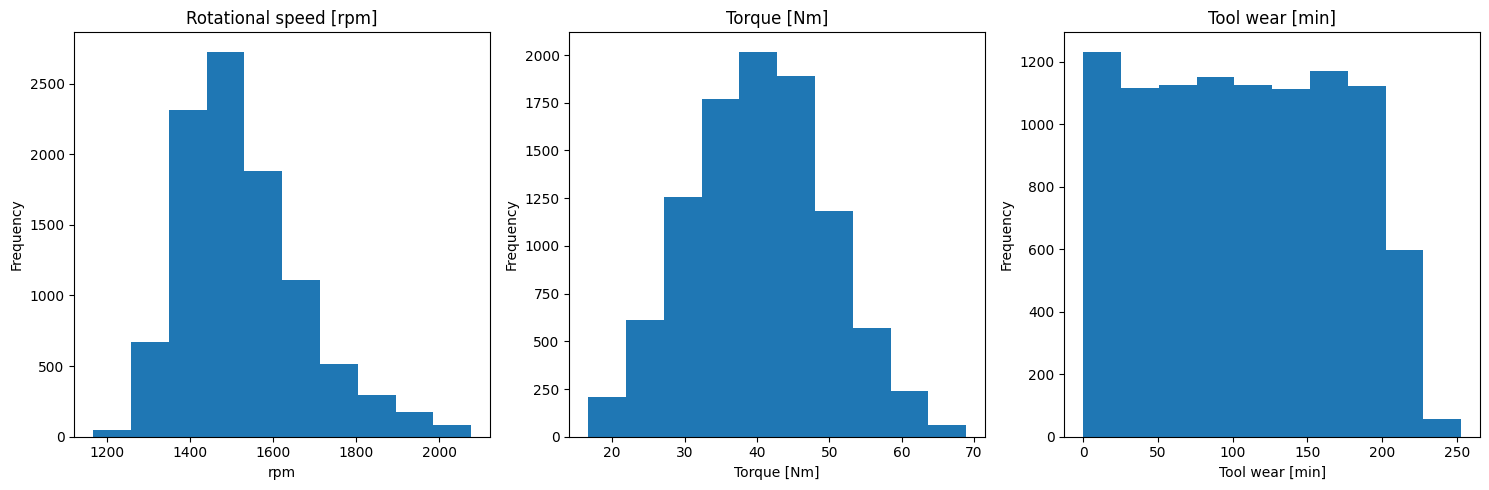

In [74]:
# Plot basic histogram based on existing column rotational speed, torque, and tool wear
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['Rotational speed [rpm]'], bins=10)
axes[0].set_title('Rotational speed [rpm]')
axes[0].set_xlabel('rpm')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Torque [Nm]'], bins=10)
axes[1].set_title('Torque [Nm]')
axes[1].set_xlabel('Torque [Nm]')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['Tool wear [min]'], bins=10)
axes[2].set_title('Tool wear [min]')
axes[2].set_xlabel('Tool wear [min]')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Heat map correlation

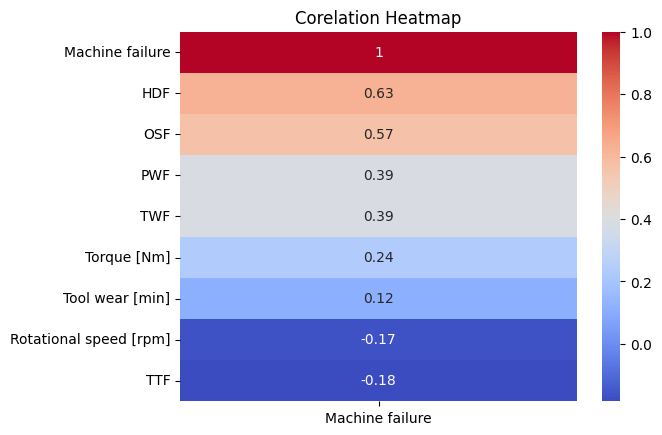

In [75]:
corr = df.corr(numeric_only=True)[['Machine failure']]
corr = corr.sort_values(by='Machine failure', ascending=False)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corelation Heatmap')
plt.show()

### TTF Trendline

Maximum TTF before reset: 254


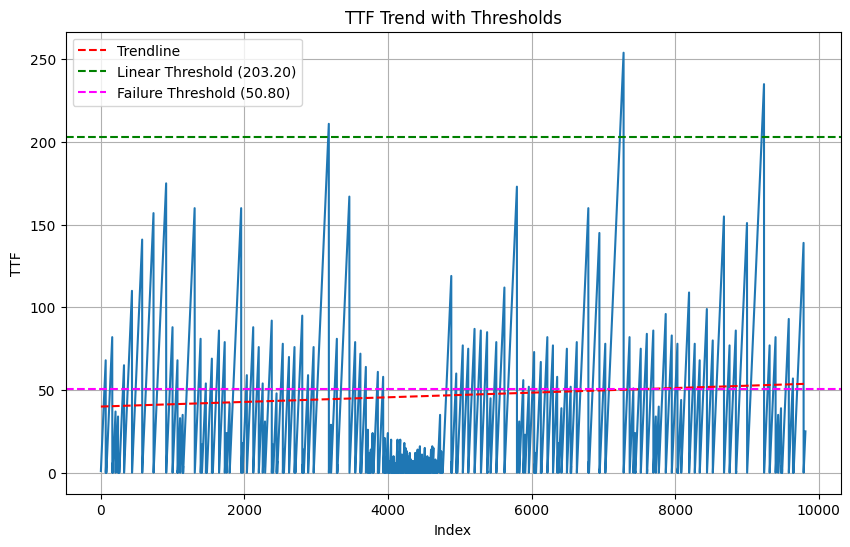

In [76]:
# Find the maximum TTF before reset to 0
max_ttf_before_reset = df['TTF'].max()
print(f"Maximum TTF before reset: {max_ttf_before_reset}")

# Filter data to only include the TTF values before reset
df_filtered = df[df['TTF'] <= max_ttf_before_reset]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['TTF'], linestyle='-')

# Add a trendline
z = np.polyfit(df_filtered.index, df_filtered['TTF'], 1)
p = np.poly1d(z)
plt.plot(df_filtered.index, p(df_filtered.index), "r--", label="Trendline")

# Determine the linear and failure threshold (example thresholds, adjust as needed)
linear_threshold = max_ttf_before_reset * 0.8  # Example: 80% of max TTF
failure_threshold = max_ttf_before_reset * 0.2 # Example: 20% of max TTF

plt.axhline(y=linear_threshold, color='g', linestyle='--', label=f"Linear Threshold ({linear_threshold:.2f})")
plt.axhline(y=failure_threshold, color='magenta', linestyle='--', label=f"Failure Threshold ({failure_threshold:.2f})")

# Customize the plot
plt.xlabel('Index')
plt.ylabel('TTF')
plt.title('TTF Trend with Thresholds')
plt.legend()
plt.grid(True)
plt.show()

## Record Time Step to Failure

Condition met where Machine failure happens (=1), record the max time step to failure.

In [77]:
# Calculate the time step to failure for each failure event
failure_indices = df.index[df['Machine failure'] == 1]
time_to_failure = []

for i in range(len(failure_indices)):
  if i == 0:
    time_to_failure.append(failure_indices[i])
  else:
    time_to_failure.append(failure_indices[i] - failure_indices[i-1])

# Print the time steps to failure
print("Time steps to failure:", time_to_failure)

Time steps to failure: [68, 8, 83, 1, 7, 38, 35, 6, 1, 10, 66, 111, 142, 158, 176, 89, 69, 2, 34, 36, 1, 5, 161, 1, 82, 18, 55, 14, 70, 12, 87, 80, 25, 43, 161, 19, 60, 89, 77, 55, 32, 1, 93, 18, 49, 8, 79, 15, 71, 77, 12, 96, 6, 15, 60, 77, 212, 30, 82, 6, 168, 1, 80, 73, 11, 65, 27, 6, 13, 8, 15, 25, 11, 62, 7, 8, 59, 22, 7, 2, 10, 25, 7, 2, 1, 6, 8, 21, 2, 1, 1, 9, 8, 2, 11, 2, 2, 2, 7, 6, 3, 6, 3, 2, 1, 21, 4, 13, 21, 2, 2, 2, 1, 4, 12, 9, 3, 1, 2, 19, 16, 3, 2, 14, 11, 2, 6, 9, 13, 2, 4, 2, 9, 5, 1, 3, 8, 3, 5, 8, 6, 6, 1, 13, 7, 6, 5, 15, 6, 9, 17, 6, 3, 8, 12, 2, 7, 5, 9, 16, 4, 1, 10, 6, 2, 1, 11, 10, 1, 3, 5, 10, 4, 4, 15, 17, 16, 2, 3, 3, 2, 2, 6, 1, 9, 7, 4, 2, 6, 2, 8, 36, 2, 14, 2, 3, 4, 4, 7, 120, 8, 61, 13, 78, 76, 88, 87, 1, 1, 86, 2, 46, 80, 113, 174, 32, 57, 24, 53, 74, 6, 13, 6, 68, 7, 1, 83, 78, 59, 19, 40, 76, 53, 5, 80, 161, 8, 146, 3, 79, 255, 83, 1, 52, 25, 2, 76, 85, 3, 87, 35, 41, 97, 84, 79, 3, 4, 45, 110, 79, 69, 100, 1, 81, 156, 78, 87, 1, 1, 2, 152, 1, 236

In [78]:
print("Mean time to failure:", np.mean(time_to_failure))
print("Median time to failure:", np.median(time_to_failure))

Mean time to failure: 34.22727272727273
Median time to failure: 10.0


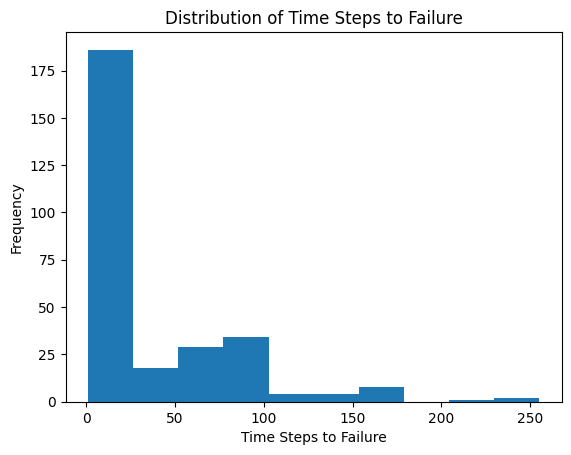

In [79]:
# Histogram of time step to failure
plt.hist(time_to_failure, bins=10)  # Adjust bins as needed
plt.xlabel('Time Steps to Failure')
plt.ylabel('Frequency')
plt.title('Distribution of Time Steps to Failure')
plt.show()